# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [5]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [6]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

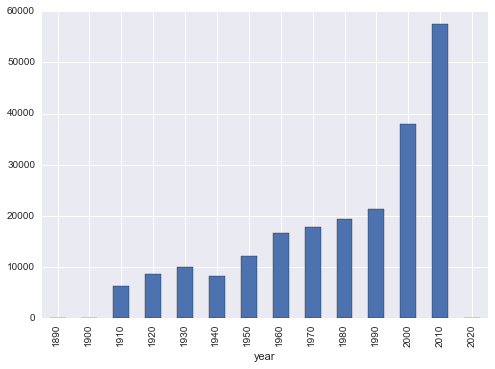

In [7]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

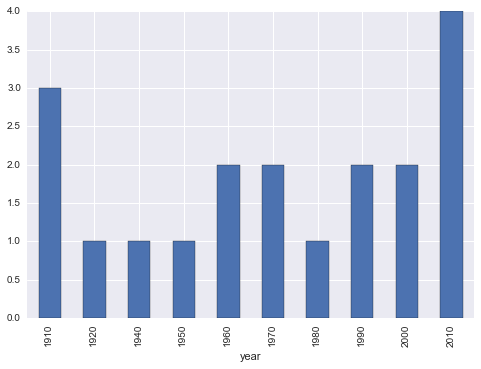

In [8]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [9]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
                ... 
1957  actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [11]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.groupby(['year'])[['n']].max()
c

,n
year,
1963,15
2006,50


<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [12]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [13]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [30]:
cast1990 = cast[cast['year'] >= 1990]

In [ ]:
# slow!
cast1990.groupby('name').aggregate(lambda x: (x['n'] == 1).sum())

In [33]:
leading = cast1990['n'] == 1
leading = leading.groupby(cast1990['name']).sum()
leading.nlargest(10)

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [14]:
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


In [9]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [15]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [16]:
df.groupby('key').transform(normalize)

,data
0,-1
1,-1
2,-1
3,0
4,0
5,0
6,1
7,1
8,1


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [15]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [17]:
cast['n_total'] = cast.groupby('title')['n'].transform('max')
cast.head()

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of number roles of actors and actresses to the total number of roles per decade and plot this for both in time (tip: you need to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.
</div>

In [17]:
sums_decade = cast.groupby([cast['year'] // 10 * 10, 'type']).size()
sums_decade

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       26700
                  ...  
2000  actress    256560
2010  actor      558941
      actress    311837
2020  actor          43
      actress        15
dtype: int64

In [18]:
ratios_decade = sums_decade.groupby(level='year').transform(lambda x: x / x.sum())
ratios_decade

year  type   
1890  actor      0.666667
      actress    0.333333
1900  actor      0.771429
      actress    0.228571
1910  actor      0.636366
                   ...   
2000  actress    0.350347
2010  actor      0.641887
      actress    0.358113
2020  actor      0.741379
      actress    0.258621
dtype: float64

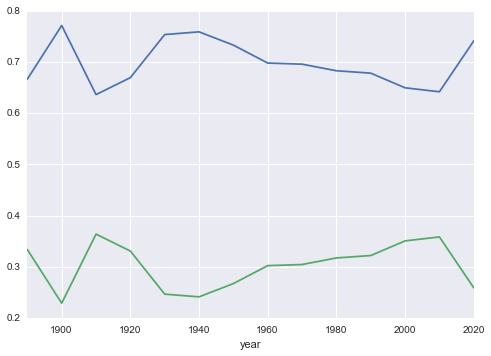

In [19]:
ratios_decade[:, 'actor'].plot()
ratios_decade[:, 'actress'].plot()

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [1]:
s = 'Bradwurst'

In [2]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [3]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])

In [4]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet':
</div>

In [14]:
hamlets = titles[titles['title'].str.contains('Hamlet')]

In [12]:
hamlets['title'].value_counts()

Hamlet                           19
Hamlet (II)                       5
Hamlet (III)                      2
Hamlet's Ghost                    1
Hamlet in the Hamptons            1
Hamlet (A Modern Adaptation)      1
Hamlet: The Fall of a Sparrow     1
Hamlet, Prince of Denmark         1
Hamlet_X                          1
Hamlet, Son of a Kingpin          1
Hamlet X                          1
Hamlet: Prince of Denmark         1
Hamlet liikemaailmassa            1
Hamlet 2                          1
Hamlet Unbound                    1
Hamlet the Vampire Slayer         1
Hamlet A.D.D.                     1
Name: title, dtype: int64

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [20]:
titles.title.value_counts().head()

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
She                     11
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [21]:
t = titles
t.year.value_counts().head(3)

2015    13978
2014     8209
2013     7664
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

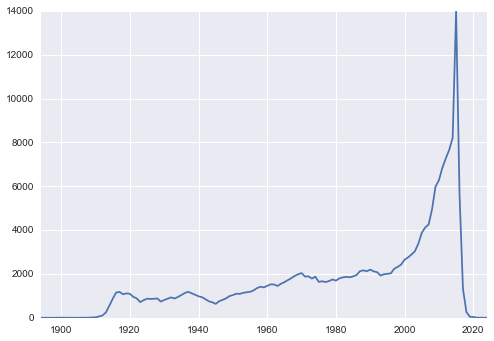

In [22]:
titles.year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

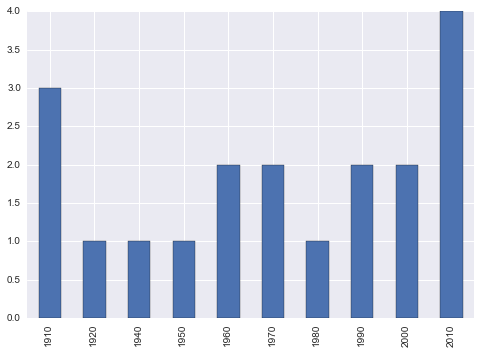

In [23]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [24]:
cast.character.value_counts().head(11)

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
               ...  
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [25]:
cast[cast.year == 2010].name.value_counts().head(10)

Lloyd Kaufman           23
Suraaj Venjarammoodu    20
Chris (II) Eddy         20
Jagathi Sreekumar       20
Danny Trejo             17
Matt Simpson Siegel     17
Joe Estevez             15
Kyle Rea                15
Ben (II) Bishop         15
Brahmanandam            15
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

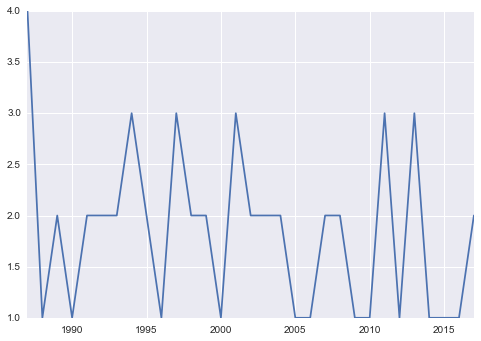

In [26]:
cast[cast.name == 'Brad Pitt'].year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [27]:
c = cast
c[c.title.str.startswith('The Life')].title.value_counts().head(10)

The Life of David Gale                      137
The Life Aquatic with Steve Zissou           78
The Life Before Her Eyes                     74
The Life of Riley                            73
The Life and Death of Peter Sellers          65
The Life and Death of Colonel Blimp          58
The Life and Hard Times of Guy Terrifico     53
The Life and Times of Judge Roy Bean         50
The Life of Emile Zola                       46
The Life of the Party                        45
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [28]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6388
actress    2813
dtype: int64

In [29]:
c = cast
c = c[c.year // 10 == 200]
c = c[c.n == 1]
c.type.value_counts()

actor      17972
actress     7537
dtype: int64